In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [80]:
df_ropa = pd.read_csv('./dataRopa.csv')
df_ropa

,alt,src,price,target,store,clothesType
0,"JEAN SKINNY, H&O, GRIS, 78% ALGODÓN 20% POLIES...",https://images.deprati.com.ec/sys-master/image...,"$28,78",mujer,De Prati,jean
1,"ENTERIZO HALTER LARGO, H&O, CRUDO, 100% Poliéster",https://images.deprati.com.ec/sys-master/image...,"$39,98",mujer,De Prati,enterizo
2,"JEAN SKINNY, H&O, AZUL CLARO, 78% ALGODÓN 20% ...",https://images.deprati.com.ec/sys-master/image...,"$28,78",mujer,De Prati,jean
3,"JEAN SKINNY, H&O, AZUL CLARO, 97% ALGODON 3% E...",https://images.deprati.com.ec/sys-master/image...,"$28,78",mujer,De Prati,jean
4,"BUZO UNICOLOR CUT OUT, H&O, ROJO, 65% Polieste...",https://images.deprati.com.ec/sys-master/image...,"$23,99",mujer,De Prati,buzo
...,...,...,...,...,...,...
8620,Bikini Tanga Caballero Esteban Llano Plomo - T...,https://d2o812a6k13pkp.cloudfront.net/fit-in/1...,$3.39,hombre,RioStore,traje de baño
8621,Camiseta Caballero New Spring Cuello Rendondo ...,https://d2o812a6k13pkp.cloudfront.net/fit-in/1...,$6.53,hombre,RioStore,camiseta
8622,Camiseta Caballero New Spring Cuello En V - Va...,https://d2o812a6k13pkp.cloudfront.net/fit-in/1...,$6.53,hombre,RioStore,camiseta
8623,Boxer Caballero Everlast Llano Blanco - Varias...,https://d2o812a6k13pkp.cloudfront.net/fit-in/1...,$7.85,hombre,RioStore,boxer


In [90]:
df_ropa[df_ropa["alt"].str.contains("x3")]

,alt,src,price,target,store,clothesType
1004,Pack x3 Panty Tanga,https://www.etafashion.com/medias/500000092831...,"$12,99",mujer,EtaFashion,panty
2007,Cachetero Pack x3,https://www.etafashion.com/medias/500000091858...,"$15,99",mujer,EtaFashion,panty
2646,Medias Tobilleras Pack x3,https://www.etafashion.com/medias/500000090002...,"$5,99",mujer,EtaFashion,medias
2688,Medias Tobilleras Pack x3,https://www.etafashion.com/medias/500000090002...,"$5,99",mujer,EtaFashion,medias
2718,Medias Tobilleras Pack x3,https://www.etafashion.com/medias/500000090002...,"$6,99",mujer,EtaFashion,medias
2764,Medias Baleta x3,https://www.etafashion.com/medias/500000087109...,"$6,99",mujer,EtaFashion,medias
2805,Medias Tobilleras Pack x3,https://www.etafashion.com/medias/500000090001...,"$6,99",mujer,EtaFashion,medias
2887,Pack panty encaje x3,https://www.etafashion.com/medias/500000085265...,"$15,99",mujer,EtaFashion,panty
4960,Medias pack x3,https://www.etafashion.com/medias/500000087246...,"$3,99",infante,EtaFashion,medias
5494,Pack Boxer Teen x3,https://www.etafashion.com/medias/500000086630...,"$15,99",infante,EtaFashion,boxer


In [93]:
ropa_descripciones = df_ropa["alt"]
ropa_descripciones

0       JEAN SKINNY, H&O, GRIS, 78% ALGODÓN 20% POLIES...
1       ENTERIZO HALTER LARGO, H&O, CRUDO, 100% Poliéster
2       JEAN SKINNY, H&O, AZUL CLARO, 78% ALGODÓN 20% ...
3       JEAN SKINNY, H&O, AZUL CLARO, 97% ALGODON 3% E...
4       BUZO UNICOLOR CUT OUT, H&O, ROJO, 65% Polieste...
                              ...                        
8620    Bikini Tanga Caballero Esteban Llano Plomo - T...
8621    Camiseta Caballero New Spring Cuello Rendondo ...
8622    Camiseta Caballero New Spring Cuello En V - Va...
8623    Boxer Caballero Everlast Llano Blanco - Varias...
8624    Boxer Caballero Gym Azul/Gris - Varias Tallas ...
Name: alt, Length: 8625, dtype: object

In [95]:
for x in range(len(ropa_descripciones)):
    if "x3" in ropa_descripciones[x]:
        #print(ropa_descripciones[x])
        ropa_descripciones[x] = ropa_descripciones[x].replace("x3", "")
    elif "X3" in ropa_descripciones[x]:
        ropa_descripciones[x] = ropa_descripciones[x].replace("X3", "")
    elif "x2" in ropa_descripciones[x]:
        ropa_descripciones[x] = ropa_descripciones[x].replace("x2", "")
    elif "X2" in ropa_descripciones[x]:
        ropa_descripciones[x] = ropa_descripciones[x].replace("X2", "")
    elif "x6" in ropa_descripciones[x]:
        ropa_descripciones[x] = ropa_descripciones[x].replace("x6", "")
    elif "X6" in ropa_descripciones[x]:
        ropa_descripciones[x] = ropa_descripciones[x].replace("X6", "")
    elif "x5" in ropa_descripciones[x]:
        ropa_descripciones[x] = ropa_descripciones[x].replace("x5", "")
    elif "X5" in ropa_descripciones[x]:
        ropa_descripciones[x] = ropa_descripciones[x].replace("X5", "")
    elif "1810" in ropa_descripciones[x]:
        ropa_descripciones[x] = ropa_descripciones[x].replace("1810", "")
    elif "100" in ropa_descripciones[x]:
        ropa_descripciones[x] = ropa_descripciones[x].replace("100", "")

In [100]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [101]:
stop_words_sp = set(stopwords.words('spanish'))

In [102]:
vectorizer = TfidfVectorizer(stop_words=stop_words_sp)
X1 = vectorizer.fit_transform(ropa_descripciones)
X1

<8625x1512 sparse matrix of type '<class 'numpy.float64'>'
	with 37044 stored elements in Compressed Sparse Row format>

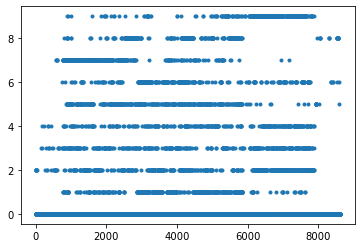

In [112]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X1)
plt.plot(y_kmeans, ".")
plt.show()

In [104]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [105]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 estampada
 camiseta
 corta
 manga
 navigare
 taxi
 escolar
 estampado
 básica
 august
Cluster 1:
 blusa
 navigare
 labelle
 unicolor
 poliéster
 manga
 crop
 cuello
 nickimarcs
 pantalón
Cluster 2:
 camiseta
 pantalón
 estampado
 labelle
 unicolor
 buzo
 august
 polo
 chompa
 manga
Cluster 3:
 pack
 camisa
 medias
 executive
 panty
 manga
 larga
 august
 bóxer
 cuadros
Cluster 4:
 jean
 just
 tubo
 jeans
 skinny
 recto
 slim
 jegging
 alto
 fit
Cluster 5:
 lady
 eta
 blusa
 holgada
 tejido
 cárdigan
 vestir
 pantalón
 cuello
 floreada
Cluster 6:
 foto
 tallas
 varias
 caballero
 dama
 boxer
 blanco
 azul
 gris
 negro
Cluster 7:
 taxi
 crop
 top
 chompa
 camiseta
 buzo
 pantalón
 chaqueta
 short
 estampado
Cluster 8:
 cuello
 redondo
 camiseta
 buzo
 etabasic
 estampado
 manga
 corta
 unicolor
 larga
Cluster 9:
 varias
 tallas
 foto
 mujer
 negro
 dama
 juvenil
 bali
 panty
 brasier


C:\Users\erick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [106]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [108]:
show_recommendations("camisa rosa")

Cluster 3:
 pack
 camisa
 medias
 executive
 panty
 manga
 larga
 august
 bóxer
 cuadros


In [109]:
import pickle

In [111]:
pickle.dump(model, open("modelo_recomendaciones.sav", 'wb'))
pickle.dump(vectorizer, open("vector_recomendaciones.sav", 'wb'))